In [3]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import fftpack
from shutil import copyfile
import time
import os
import csv

In [4]:

def readImage(image_name):
    image = cv2.imread(image_name)
    return image
##

def fft(channel):
    fft = np.fft.fft2(channel)
    fshift = np.fft.fftshift(fft)
    
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    
    magnitude_spectrum = highPassFilter(magnitude_spectrum)
    return magnitude_spectrum
##

def highPassFilter(input):
    output = np.zeros((len(input),len(input[0])))
    
    rows, cols = len(input), len(input[0])
    center_row, center_col = int(rows/2), int(cols/2)
    sigma = int(len(input)*0.04)
    
    mask_circle = np.ones((rows,cols), np.uint8)

    for i in range (center_row-sigma,center_row+sigma):
        for j in range (center_col-sigma,center_col+sigma):
            
            distance = np.sqrt((center_row - i)**2 + (center_col - j)**2)
            
            if (distance < sigma):
                mask_circle[i,j] = 0
            ##
    ##

##    a, b = center_row, center_col
##    r = sigma
##    n = r*2+1
##
##    x, y = np.ogrid[-a:n-a, -b:n-b]
##    circle = x*x + y*y <= r*r
##    circle=int(circle*255)
##    print(circle[30,30])
##    print(len(circle))
##    print(len(circle[0]))
##    mask_circle[circle]=0
    
    output= input*mask_circle
    
    return output
##

def cart2pol(input):
    
    binary = np.zeros((len(input),len(input[0])))
    binarySpect = np.zeros((len(input),len(input[0])))
    
    angle = np.zeros((360,1))
    thrsh = np.amax(input)*0.8
    
    for i in range (0,len(input)):
        for j in range (0,len(input[0])):
            if (input[i,j] > thrsh):
                binarySpect[i,j] = input[i,j]
                binary[i,j] = 1
                
    ##
    
    #Coodrinate origin
    x0 = int(len(input)/2)
    y0 = int(len(input[0])/2)
    
    for i in range (0,len(input)):
        for j in range (0,len(input[0])):
            if (binary[i,j]==1):
                ind=int(np.arctan2(y0-j,x0-i) * 180 / np.pi)+90
                #print(ind)
                angle[ind]=angle[ind]+1
    ##
    
    return angle, binarySpect
##

def meanFilterHistogram(input, kernel_size):
    output = input.copy()
    n = int(kernel_size/2)
    for i in range (kernel_size,len(input)-kernel_size):
        output[i] = (input[i-n:i+n].sum())/kernel_size 
    ##
    
    return output
##

def DEV_drawGui(original_image, fft, result_image):
    plt.subplot(131),plt.imshow(original_image, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(fft, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(result_image, cmap = 'gray')
    plt.title('Filtered Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()
    return 1
##


Reading...:cps201410067304.ppm


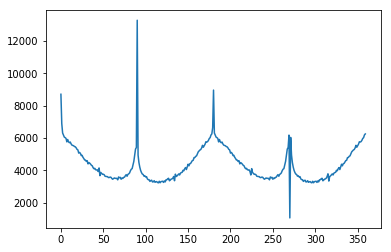

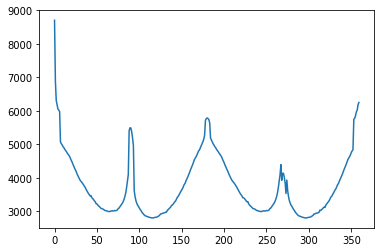

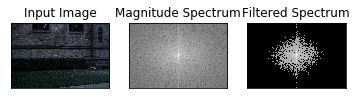

Reading...:D7H_3709.ppm


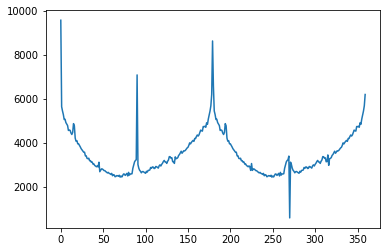

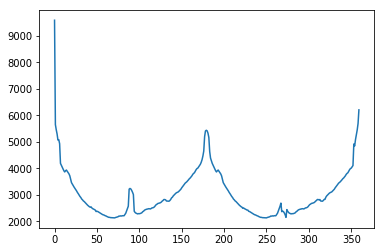

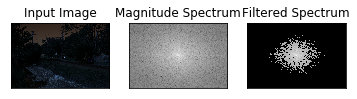

Reading...:cps201410067299.ppm


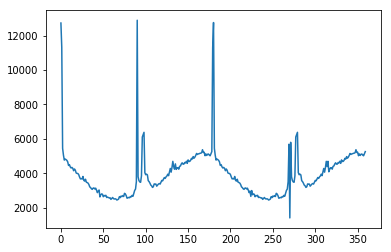

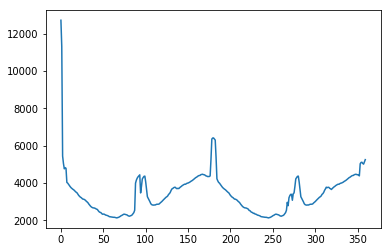

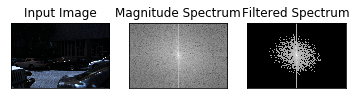

Reading...:D7H_3857.ppm


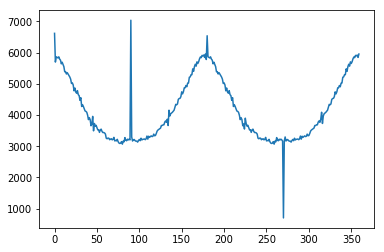

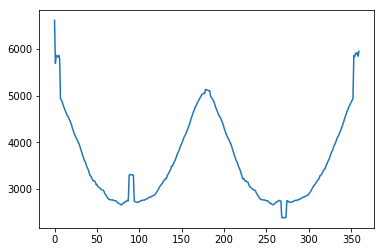

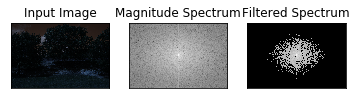

Reading...:cps201410067330.ppm


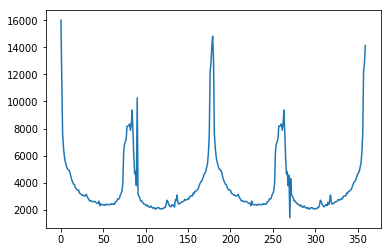

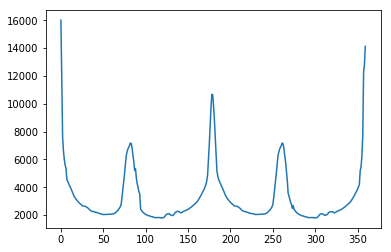

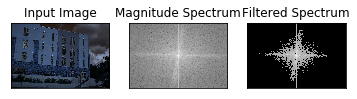

Reading...:cps201410067329.ppm


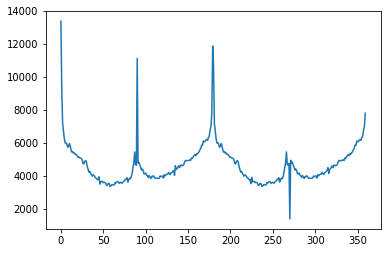

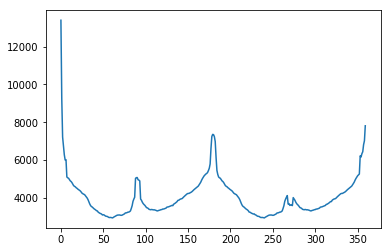

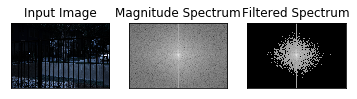

Reading...:cps201410067344.ppm


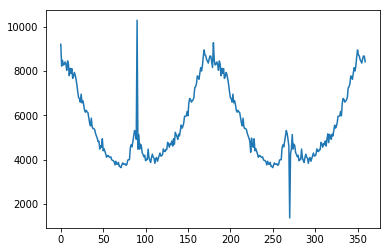

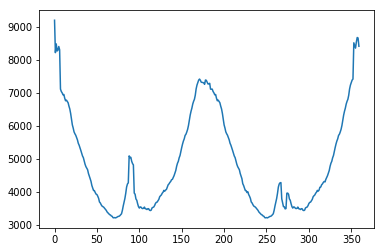

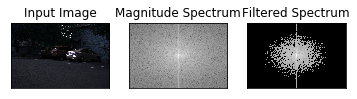

Reading...:cps201410067316.ppm


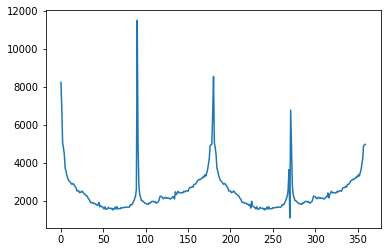

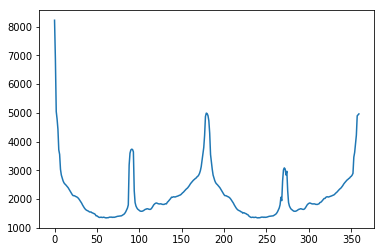

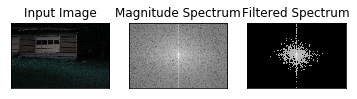

Reading...:D7H_4512.ppm


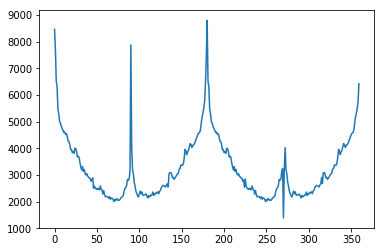

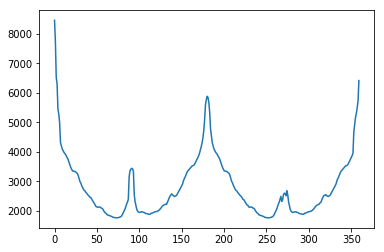

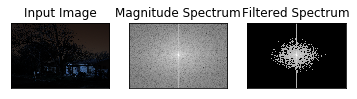

Reading...:cps201410067317.ppm


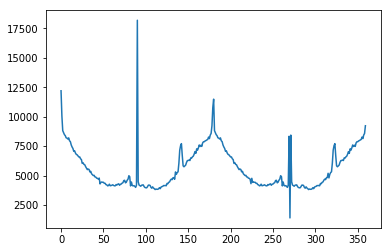

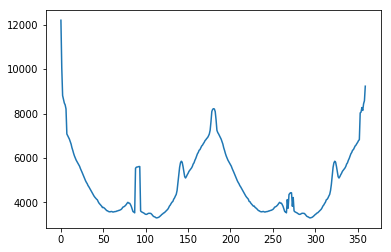

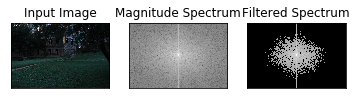

Reading...:D7H_4522.ppm


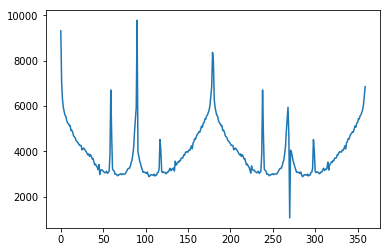

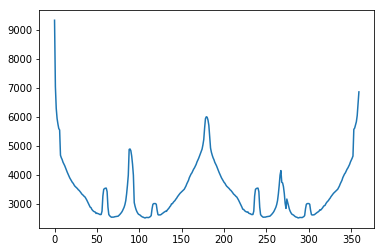

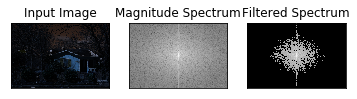

Reading...:D7H_3698.ppm


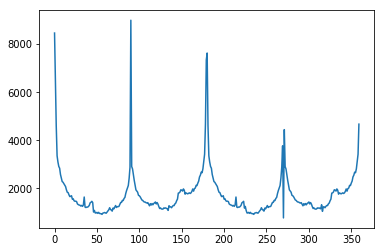

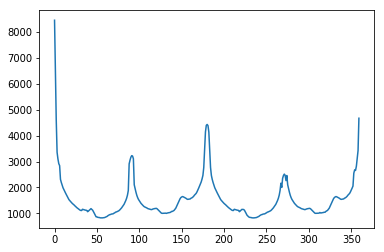

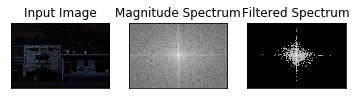

Reading...:cps201410067315.ppm


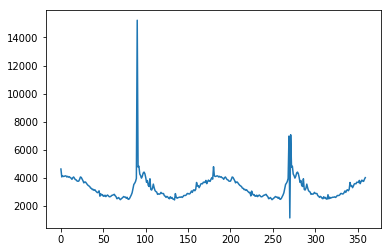

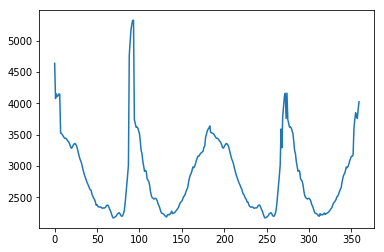

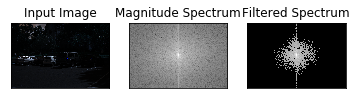

Reading...:D7H_4515.ppm


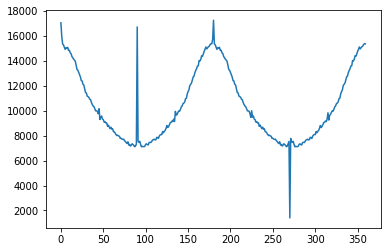

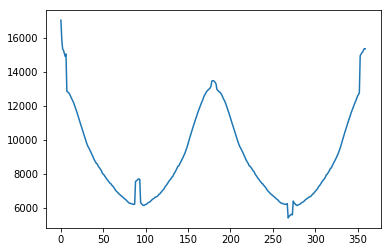

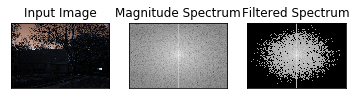

Reading...:D7H_4519.ppm


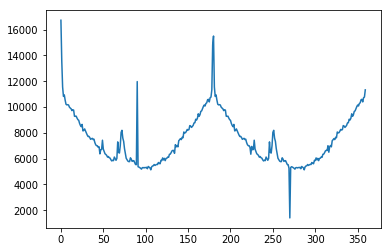

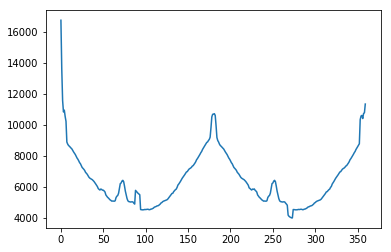

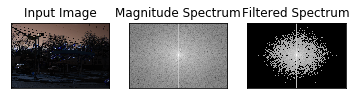

Reading...:cps201410067294.ppm


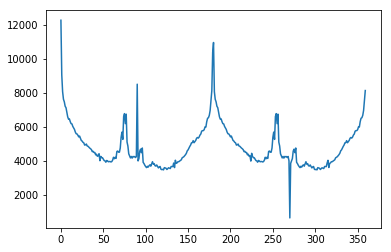

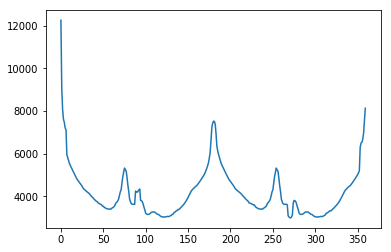

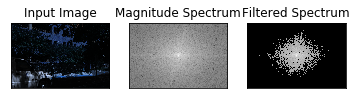

Reading...:cps201410067322.ppm


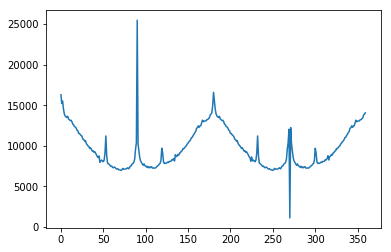

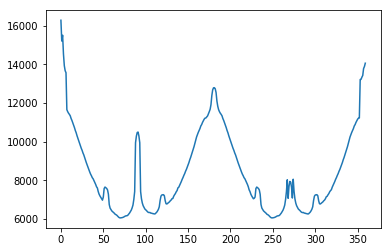

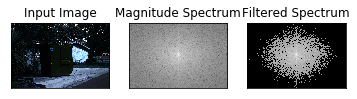

Reading...:D7H_4518.ppm


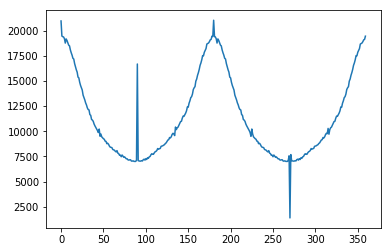

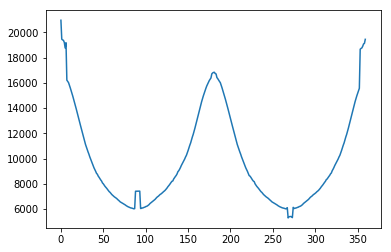

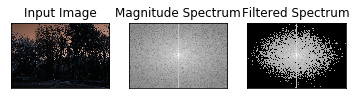

Reading...:cps201410067357.ppm


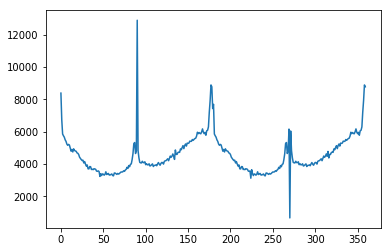

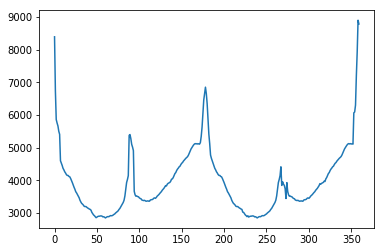

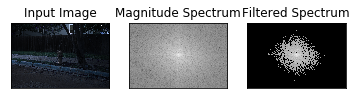

Reading...:D7H_3937.ppm


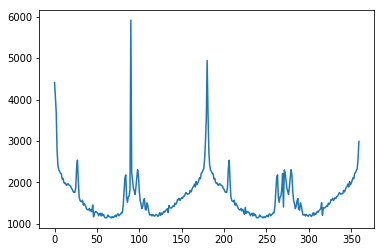

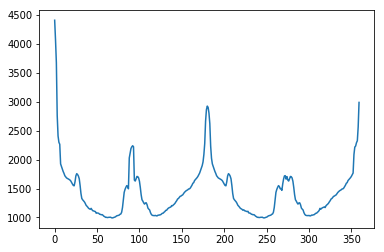

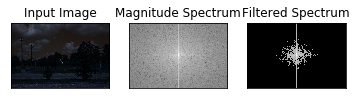

Reading...:cps201410067335.ppm


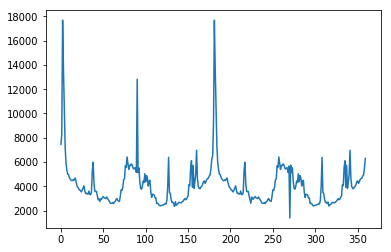

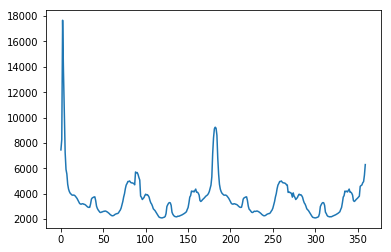

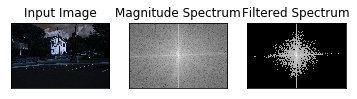

Reading...:D7H_3722.ppm


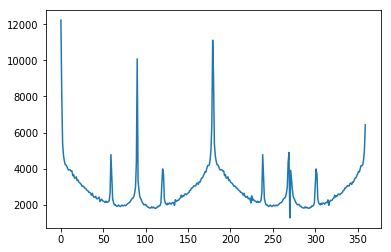

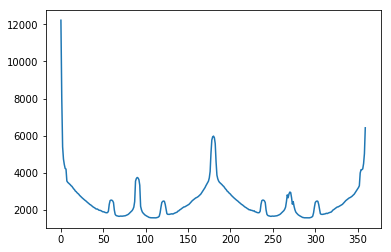

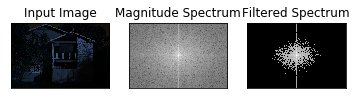

Reading...:D7H_3972.ppm


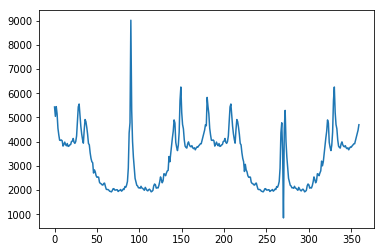

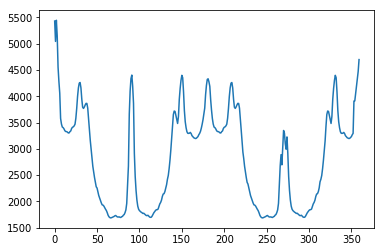

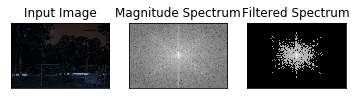

Reading...:cps201410067332.ppm


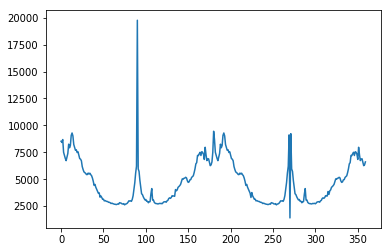

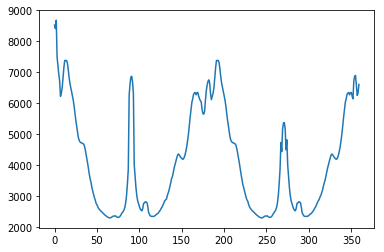

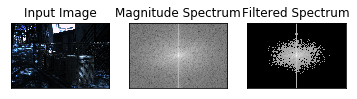

Reading...:D7H_3765.ppm


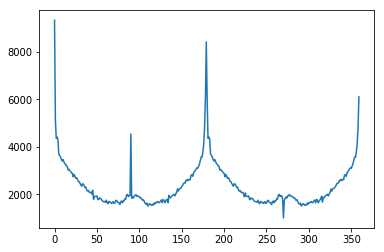

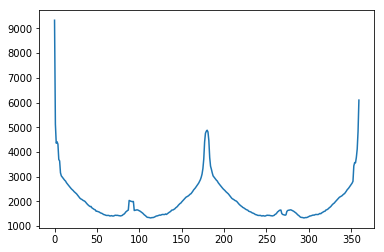

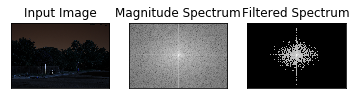

Reading...:cps201410067291.ppm


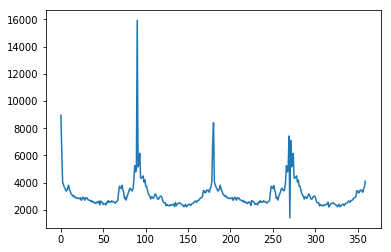

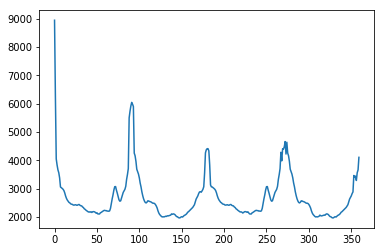

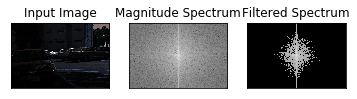

Reading...:D7H_3980.ppm


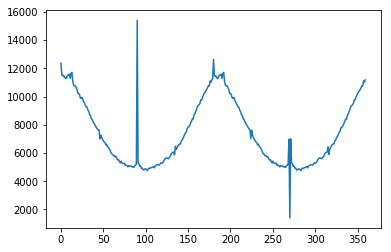

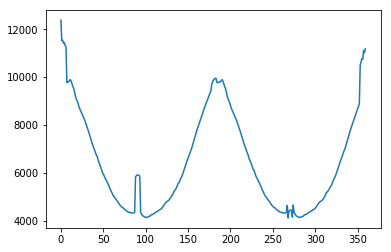

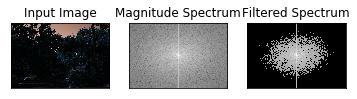

Reading...:cps201410067297.ppm


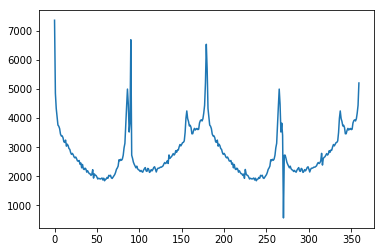

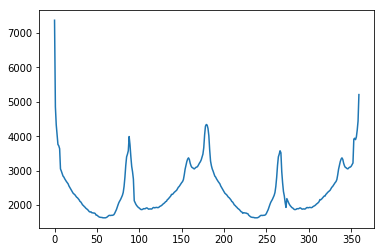

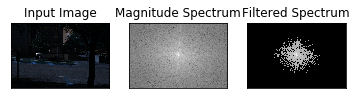

Reading...:D7H_3675.ppm


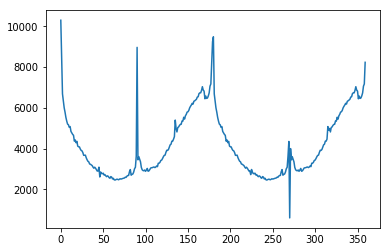

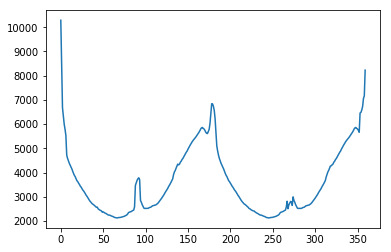

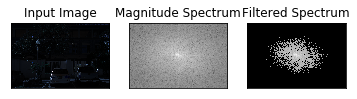

Reading...:cps201410067327.ppm


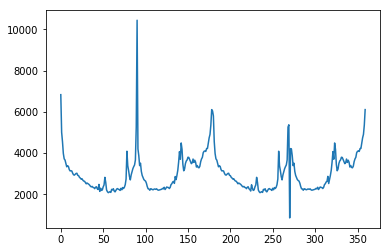

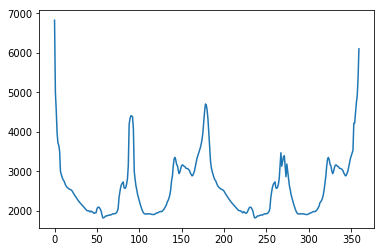

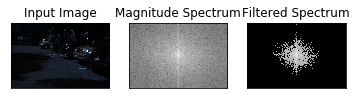

Reading...:D7H_3655.ppm


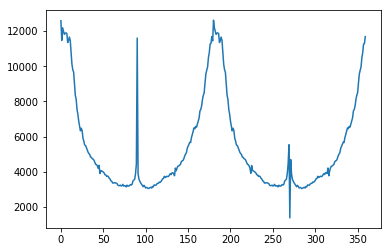

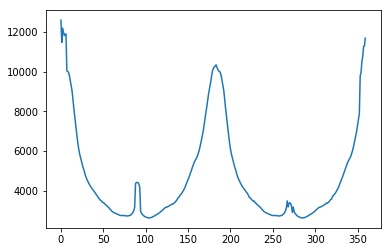

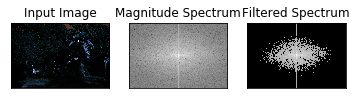

Reading...:cps201410067319.ppm


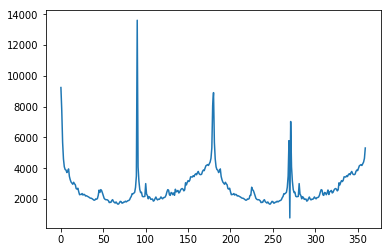

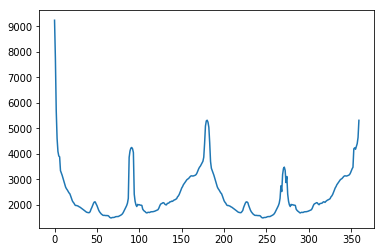

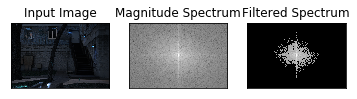

Reading...:cps201410067292.ppm


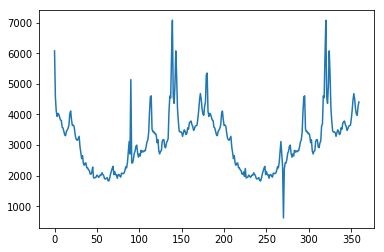

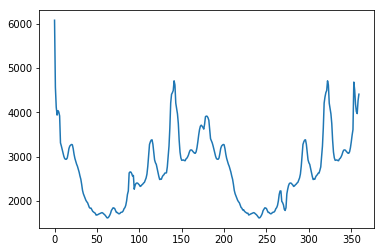

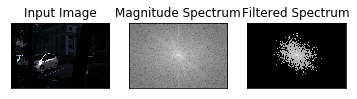

Reading...:D7H_3496.ppm


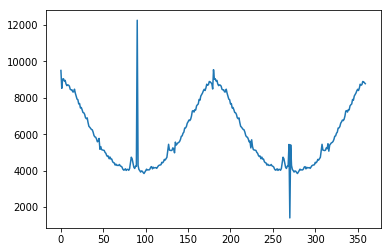

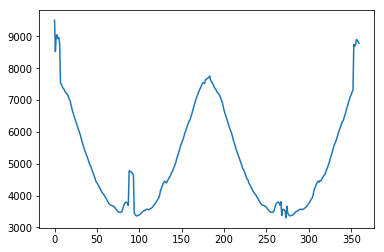

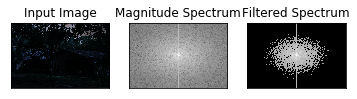

Reading...:D7H_3673.ppm


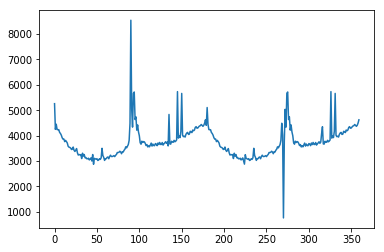

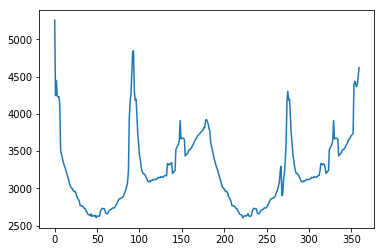

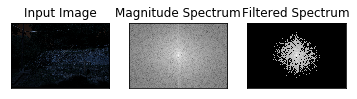

Reading...:cps201410067382.ppm


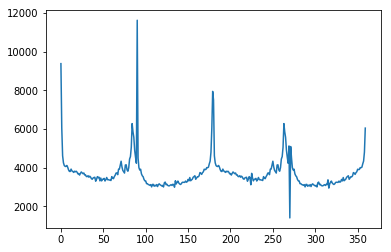

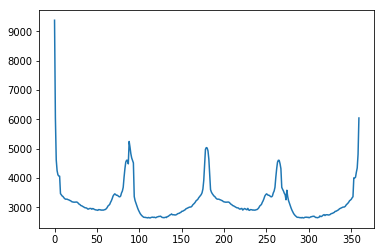

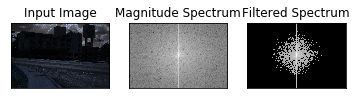

Reading...:D7H_3713.ppm


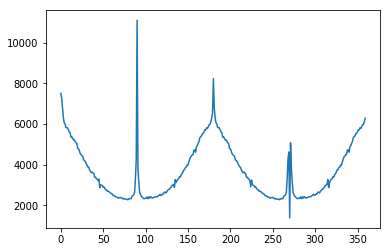

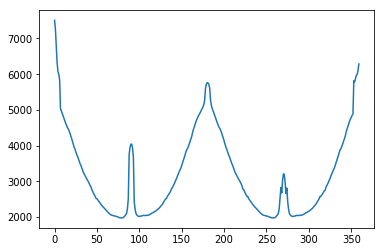

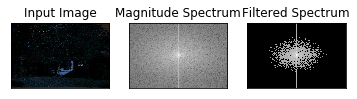

Reading...:D7H_3659.ppm


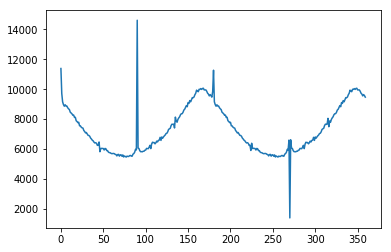

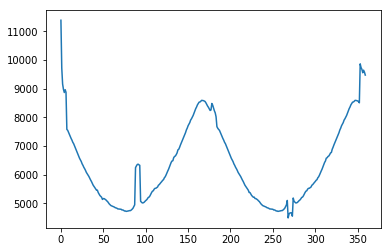

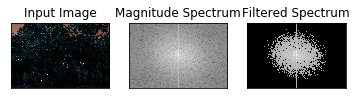

Reading...:D7H_3679.ppm


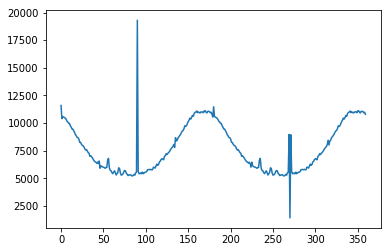

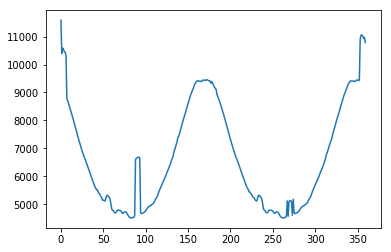

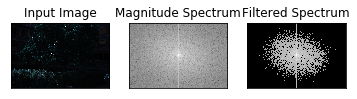

Reading...:D7H_3498.ppm


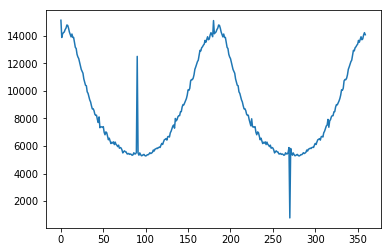

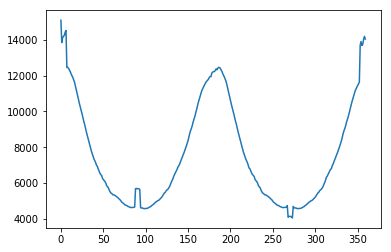

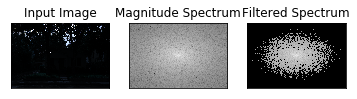

Reading...:cps201410067318.ppm


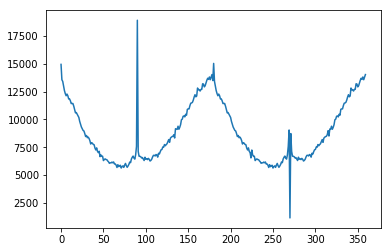

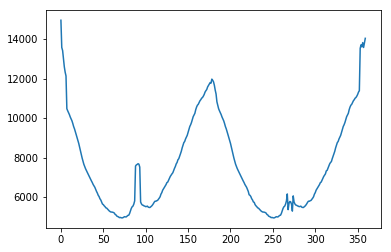

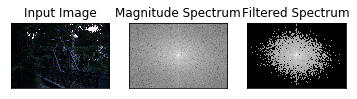

Reading...:cps201410067324.ppm


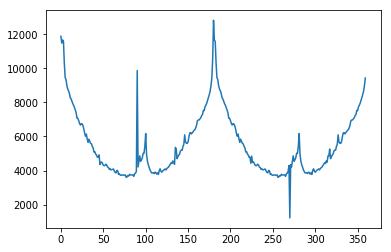

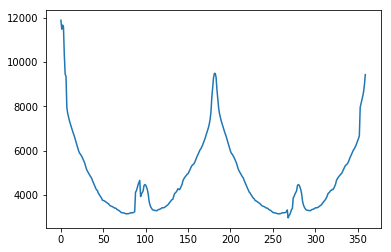

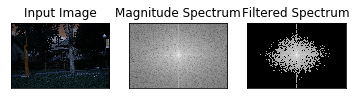

Reading...:D7H_4520.ppm


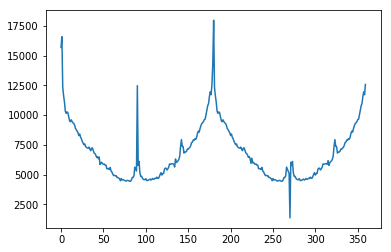

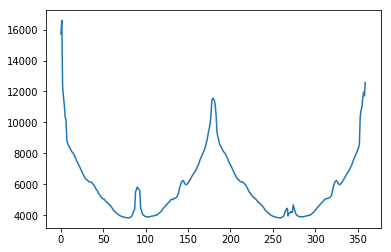

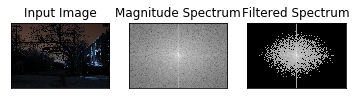

Reading...:cps201410067302.ppm


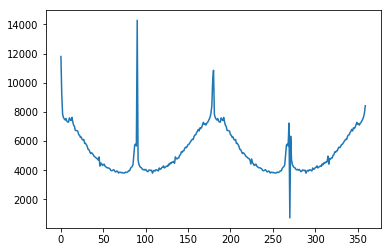

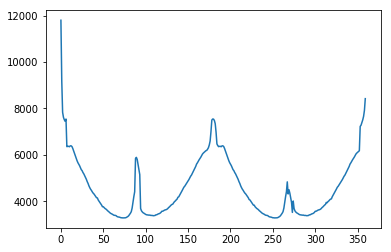

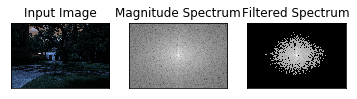

Reading...:D7H_3900.ppm


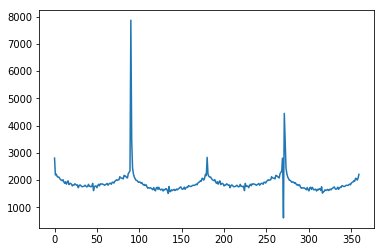

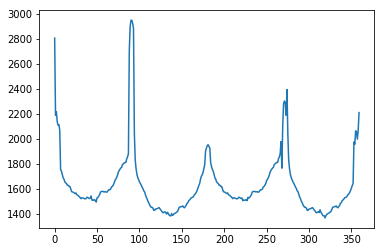

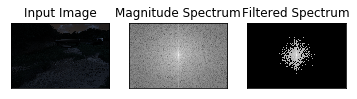

Reading...:cps201410067334.ppm


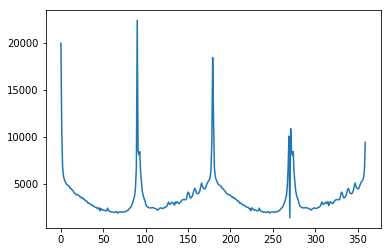

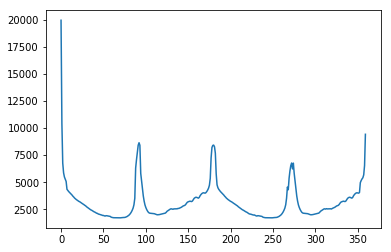

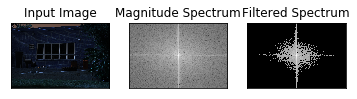

Reading...:cps201410067311.ppm


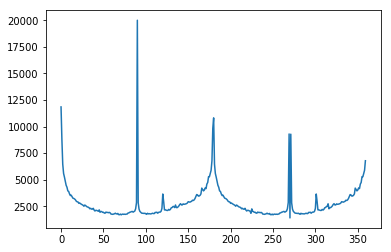

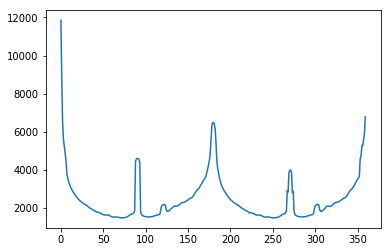

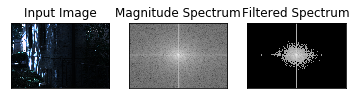

Reading...:D7H_3634.ppm


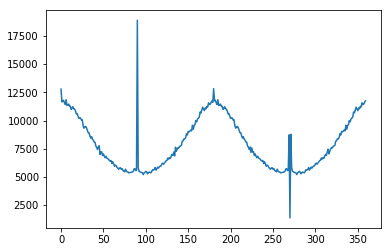

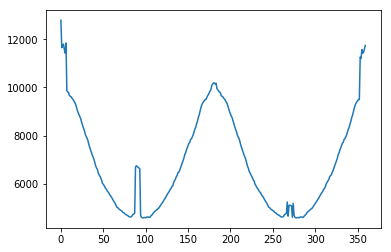

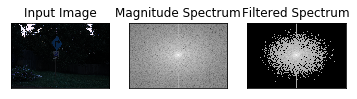

Reading...:D7H_3761.ppm


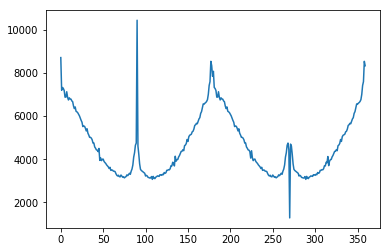

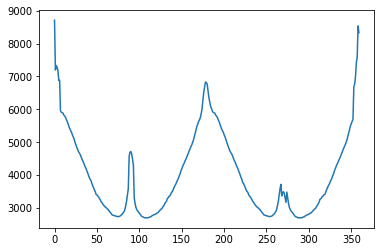

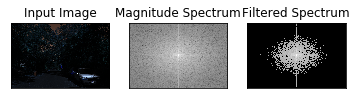

Reading...:cps201410067371.ppm


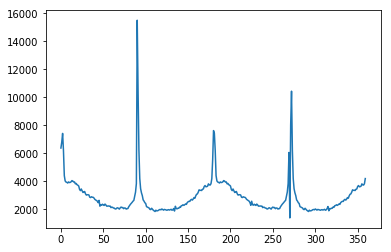

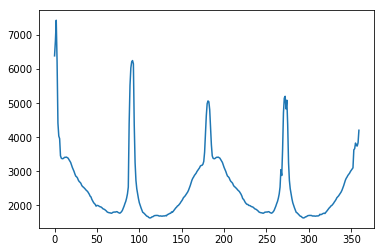

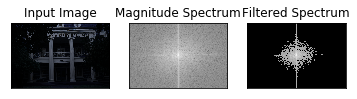

Reading...:cps201410067326.ppm


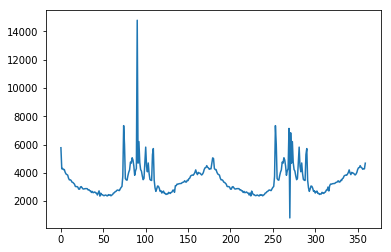

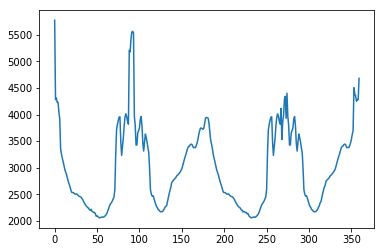

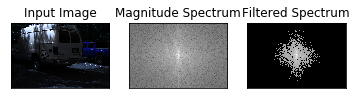

Reading...:D7H_3696.ppm


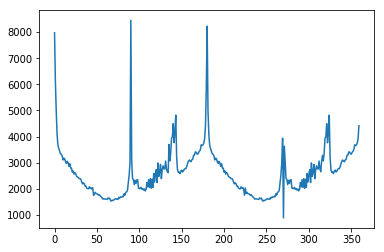

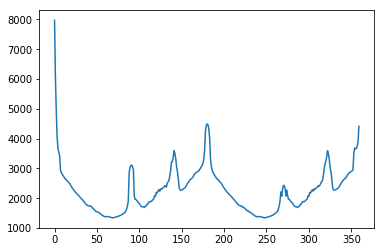

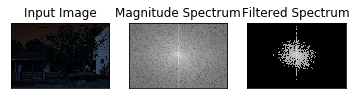

Reading...:cps201410067303.ppm


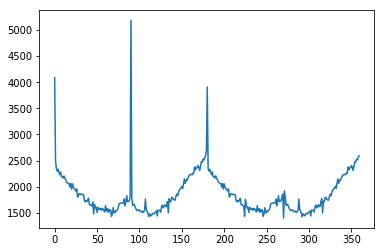

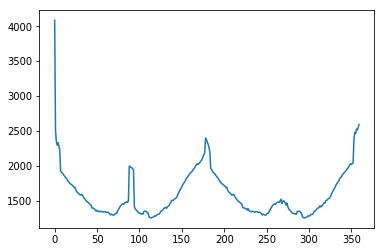

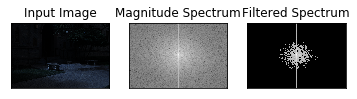

Reading...:cps201410067313.ppm


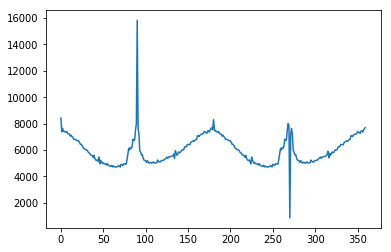

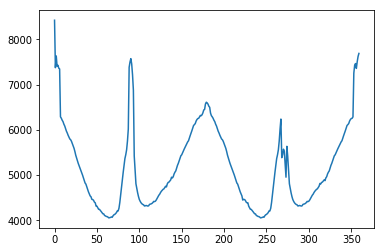

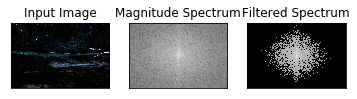

Reading...:cps201410067336.ppm


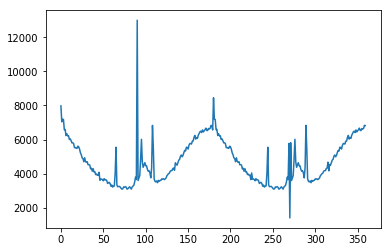

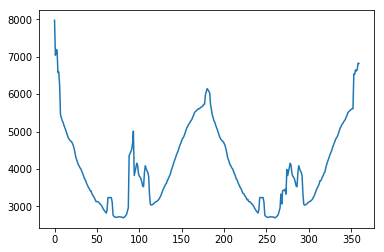

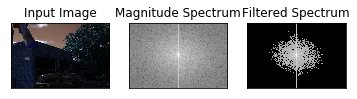

Reading...:D7H_3624.ppm


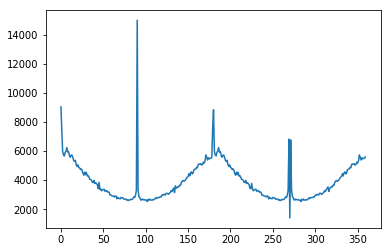

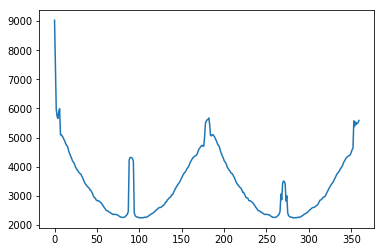

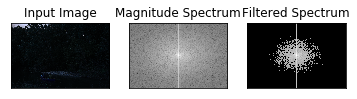

Reading...:D7H_3726.ppm


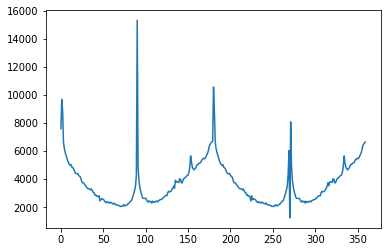

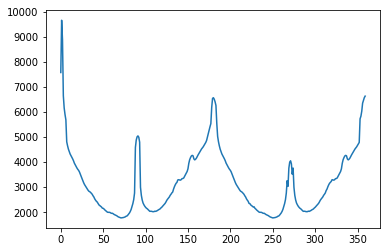

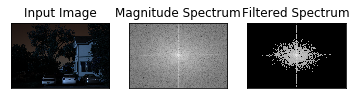

Reading...:D7H_3906.ppm


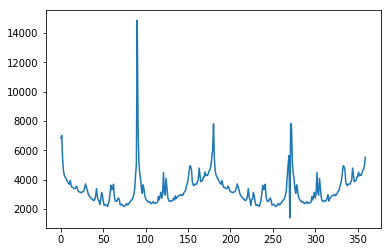

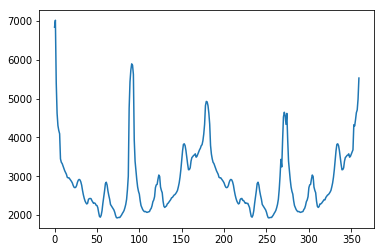

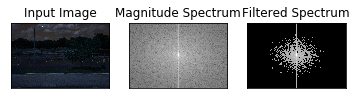

Reading...:D7H_4521.ppm


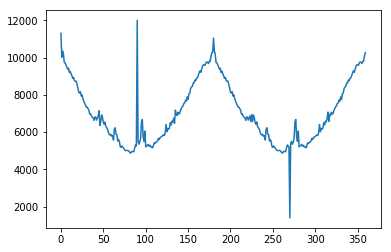

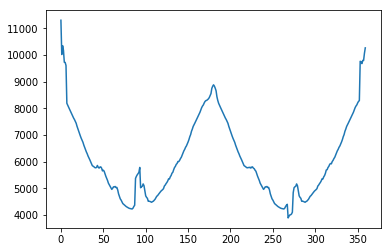

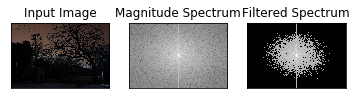

Reading...:D7H_3661.ppm


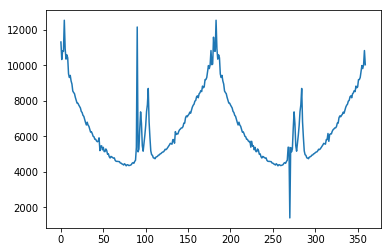

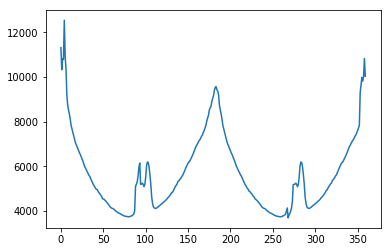

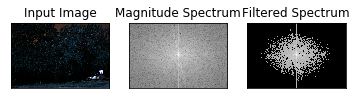

Reading...:D7H_3758.ppm


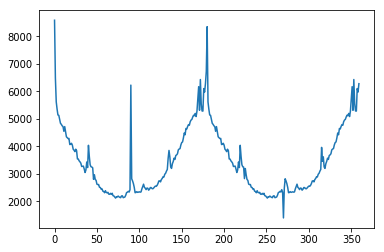

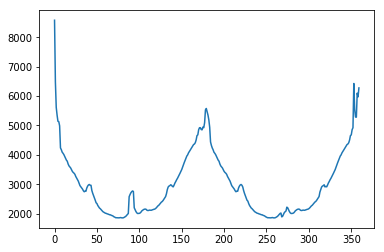

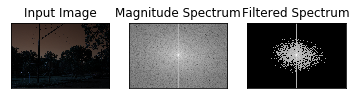

Reading...:cps201410067298.ppm


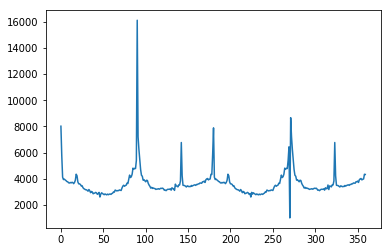

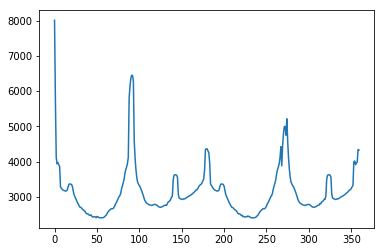

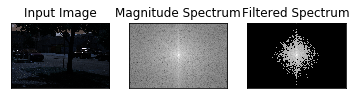

Reading...:D7H_4526.ppm


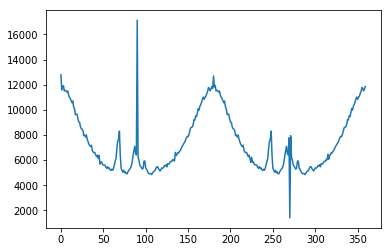

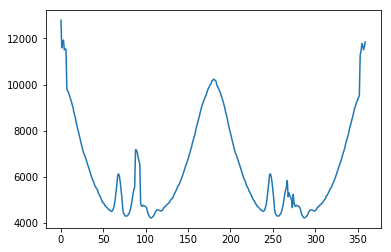

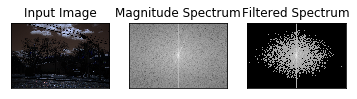

Reading...:cps201410067377.ppm


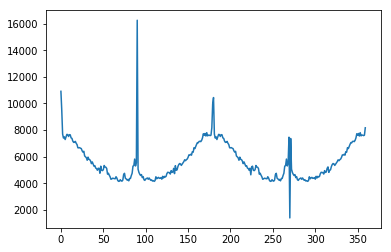

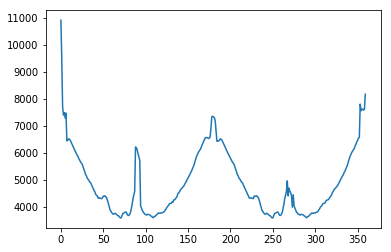

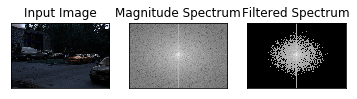

Reading...:cps201410067323.ppm


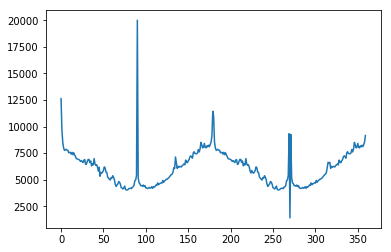

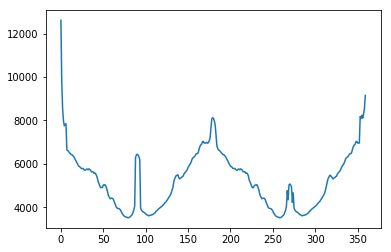

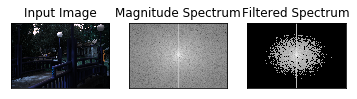

Reading...:cps201410067350.ppm


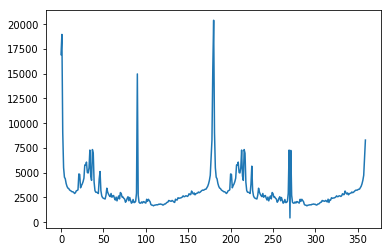

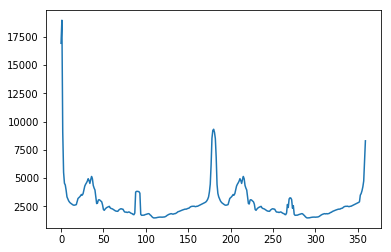

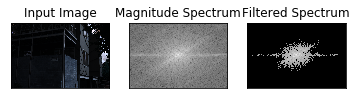

Reading...:D7H_3657.ppm


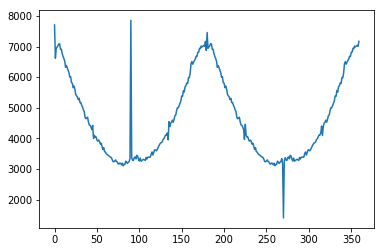

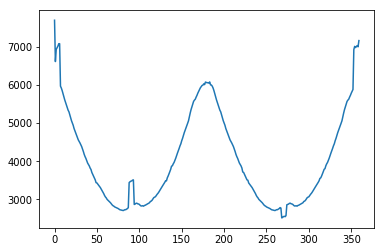

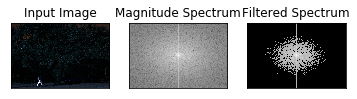

Reading...:cps201410067307.ppm


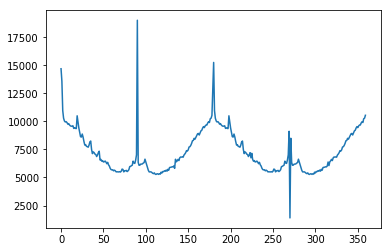

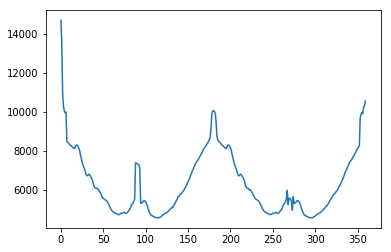

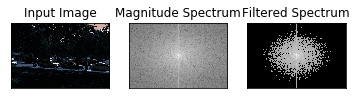

Reading...:cps201410067306.ppm


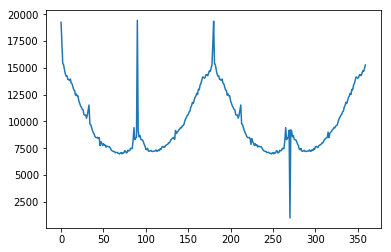

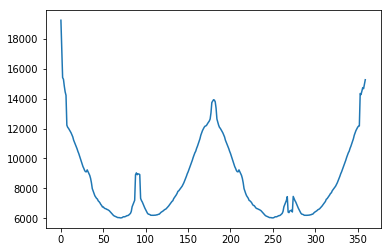

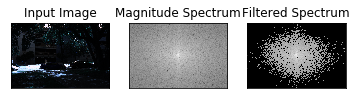

Reading...:cps201410067293.ppm


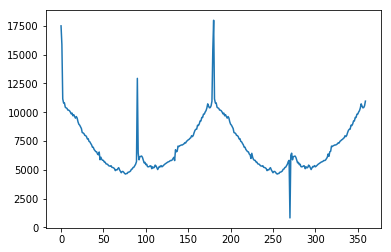

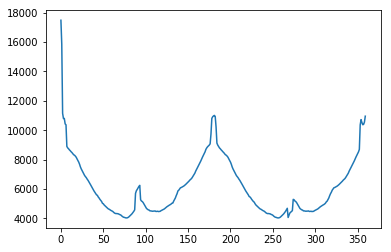

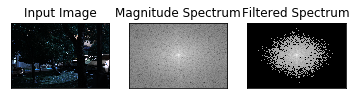

Reading...:D7H_4525.ppm


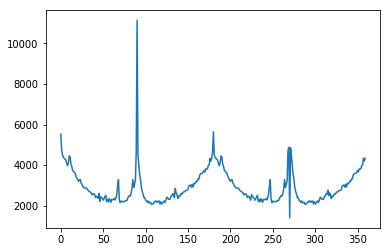

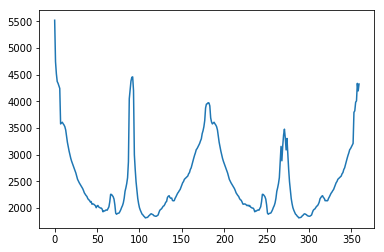

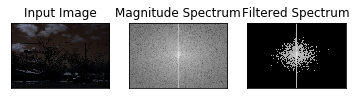

Reading...:D7H_3663.ppm


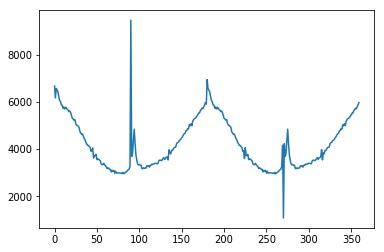

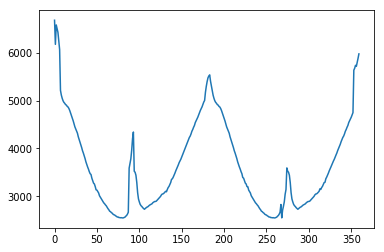

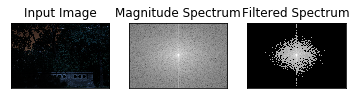

Reading...:D7H_3669.ppm


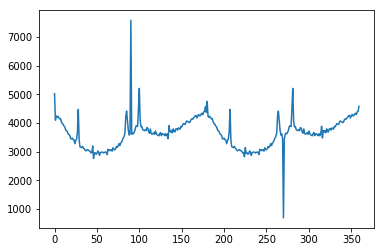

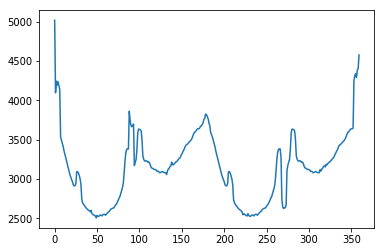

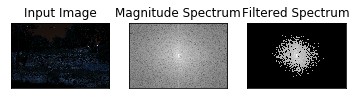

Reading...:cps201410067309.ppm


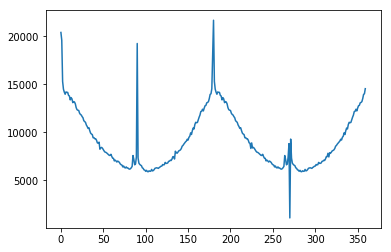

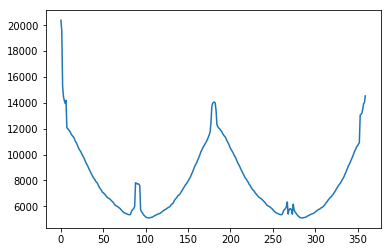

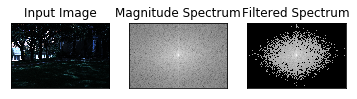

Reading...:D7H_3739.ppm


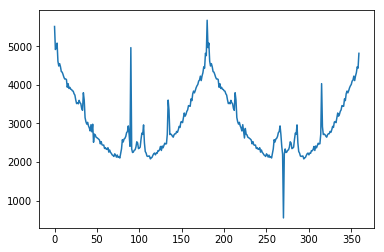

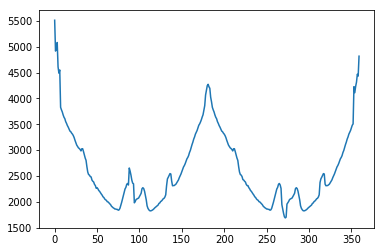

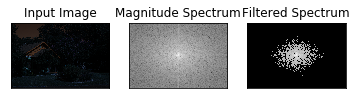

Reading...:cps201410067314.ppm


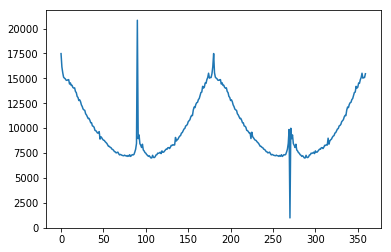

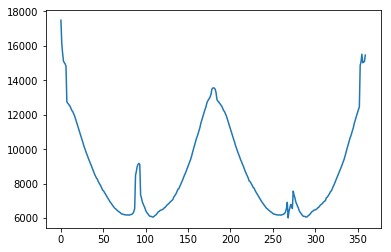

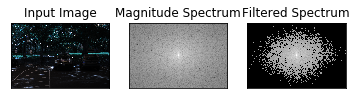

Reading...:D7H_3885.ppm


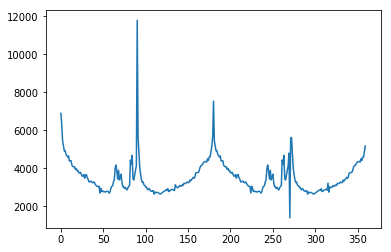

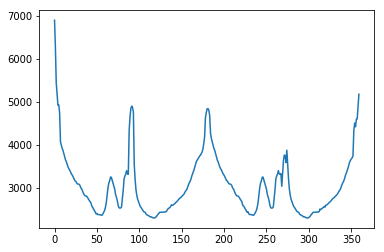

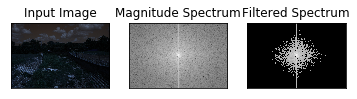

Reading...:D7H_3565.ppm


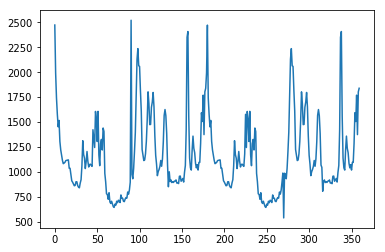

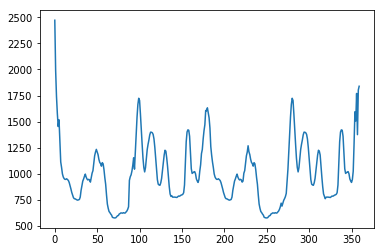

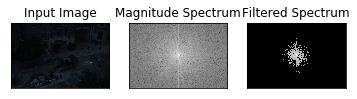

Reading...:D7H_3677.ppm


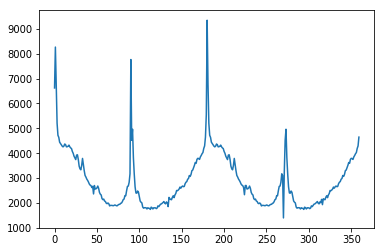

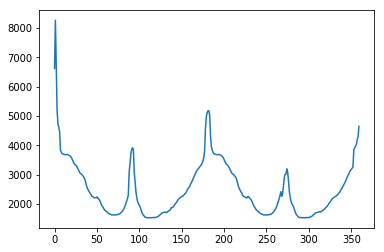

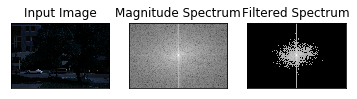

Reading...:D7H_3896.ppm


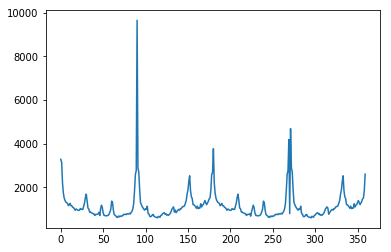

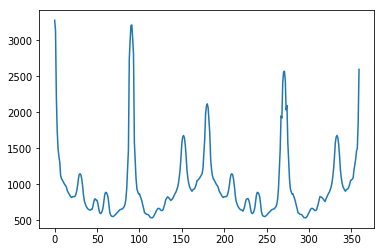

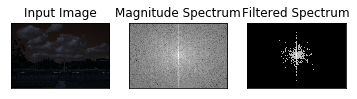

Reading...:D7H_3636.ppm


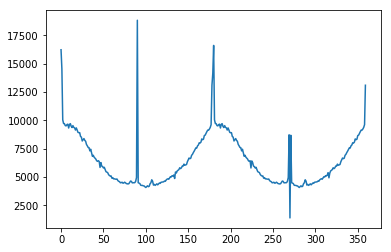

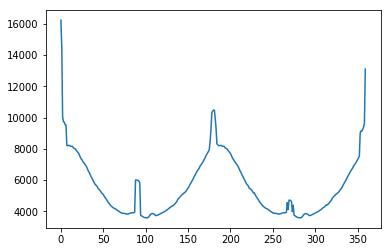

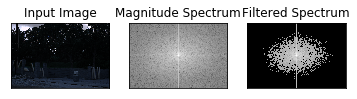

Reading...:cps201410067301.ppm


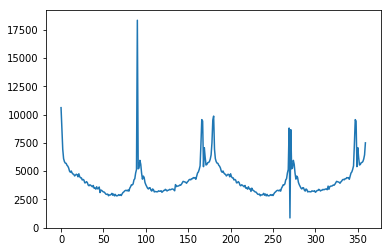

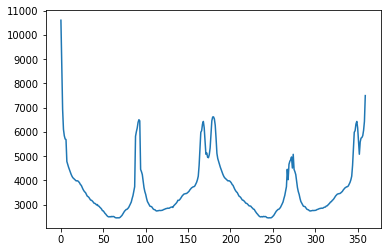

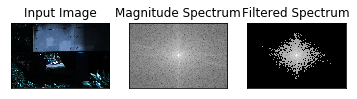

Reading...:cps201410067374.ppm


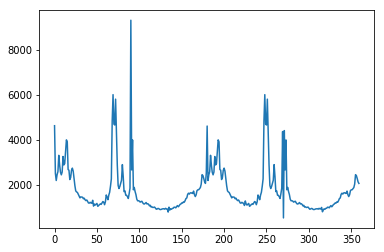

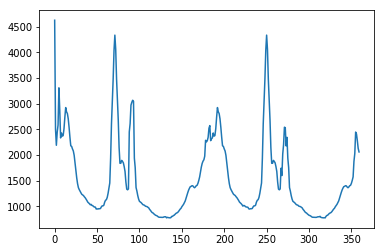

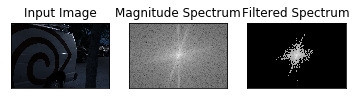

Reading...:D7H_3702.ppm


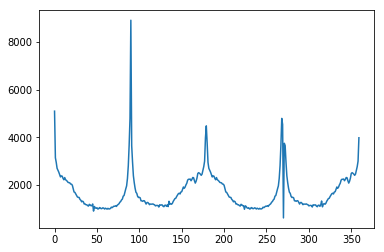

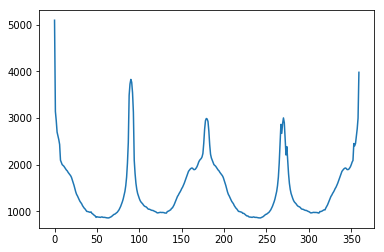

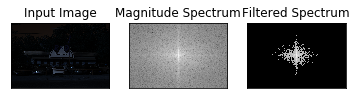

Reading...:D7H_3502.ppm


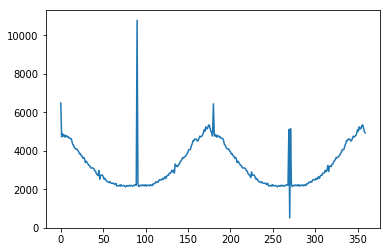

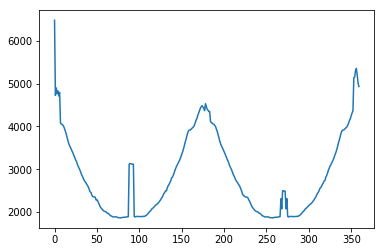

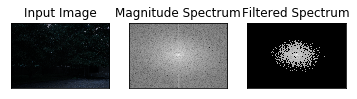

Reading...:cps201410067305.ppm


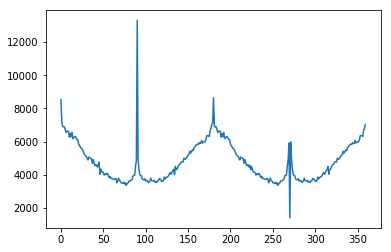

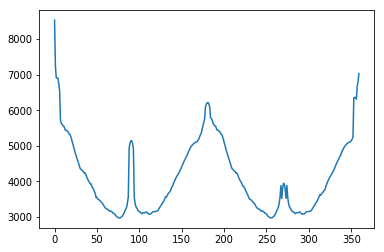

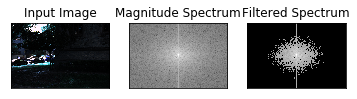

Reading...:cps201410067308.ppm


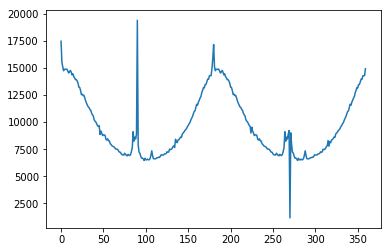

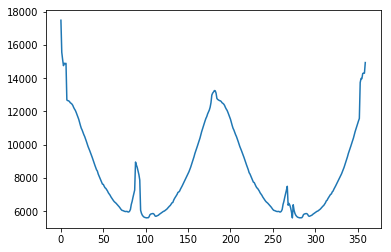

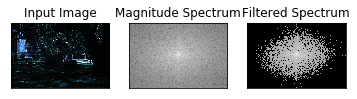

Reading...:cps201410067296.ppm


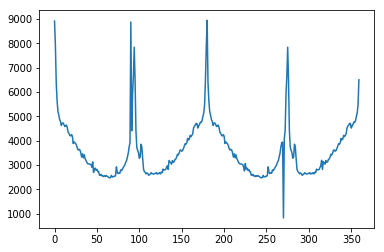

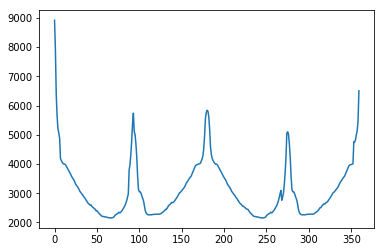

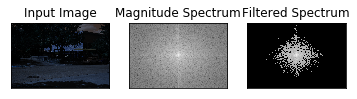

Reading...:D7H_3686.ppm


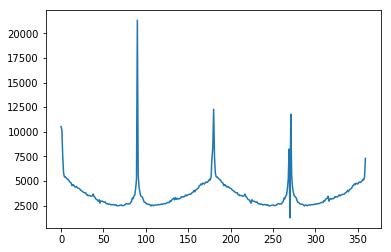

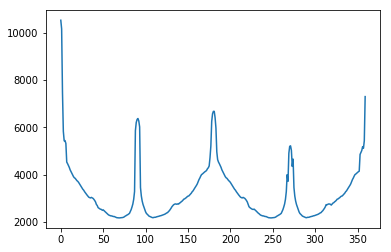

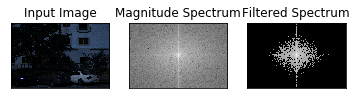

Reading...:D7H_1135.ppm


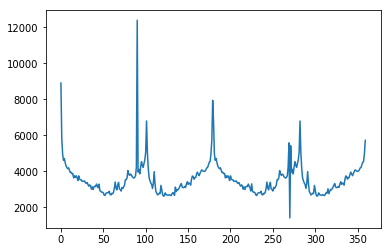

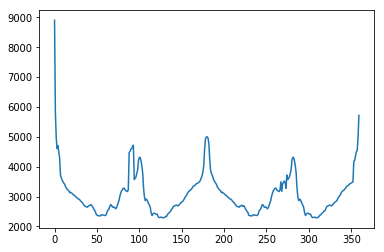

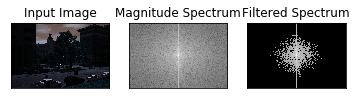

Reading...:cps201410067328.ppm


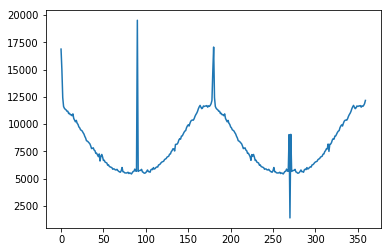

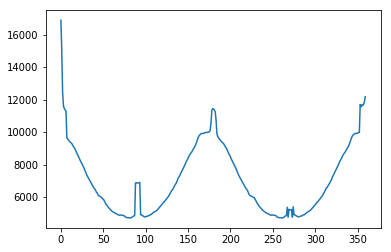

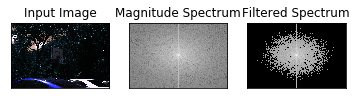

Reading...:cps201410067310.ppm


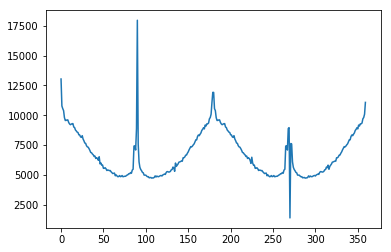

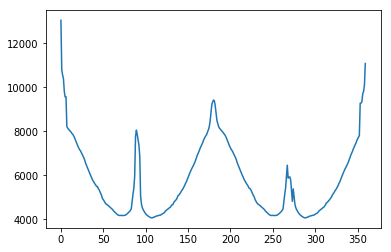

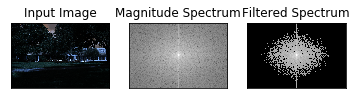

Reading...:D7H_3716.ppm


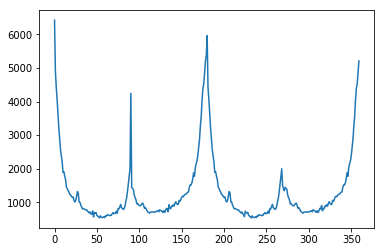

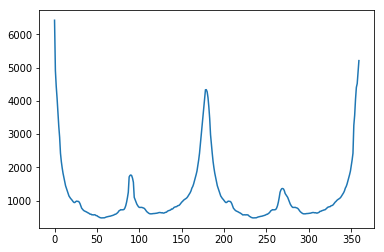

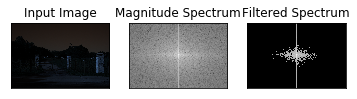

Reading...:D7H_3875.ppm


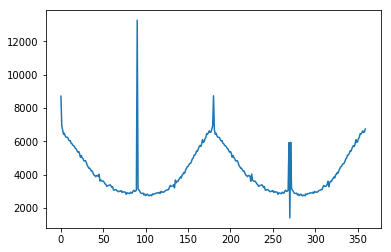

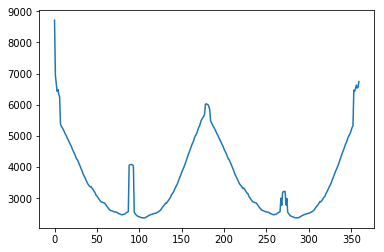

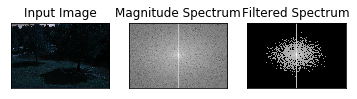

Reading...:cps201410067325.ppm


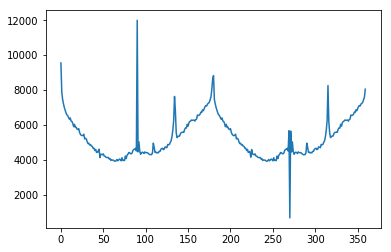

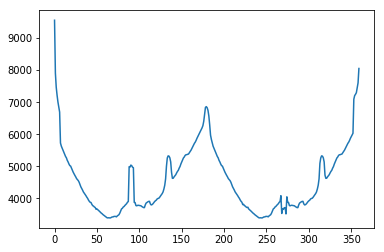

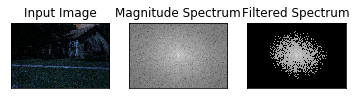

Reading...:D7H_3948.ppm


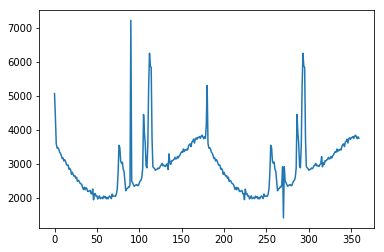

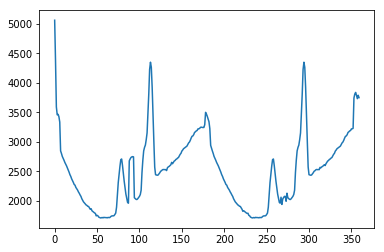

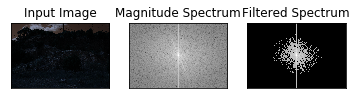

Reading...:D7H_3931.ppm


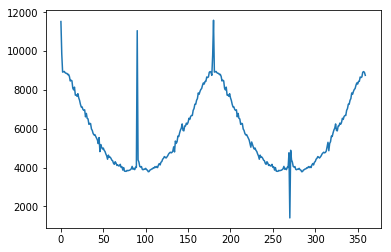

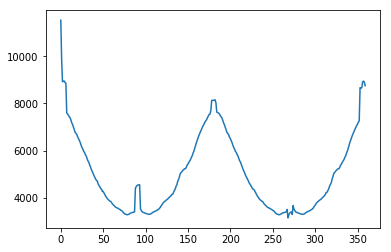

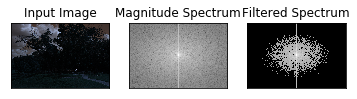

Reading...:cps201004281353.ppm


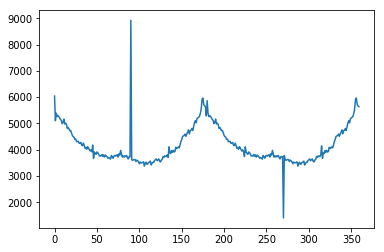

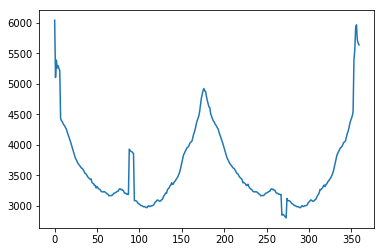

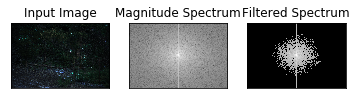

Reading...:D7H_3652.ppm


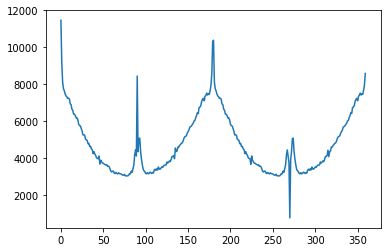

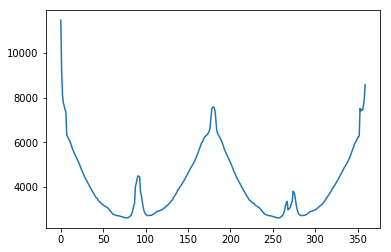

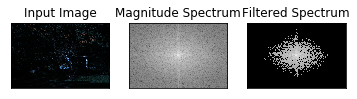

Reading...:cps201410067295.ppm


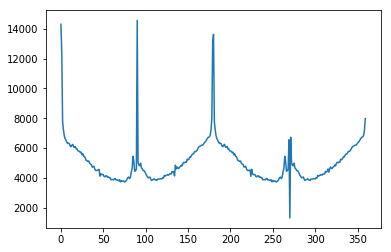

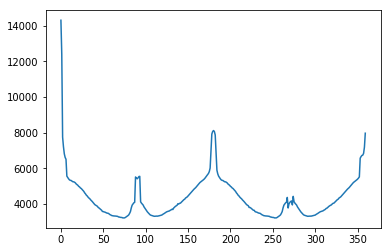

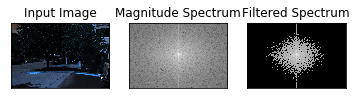

Reading...:D7H_4523.ppm


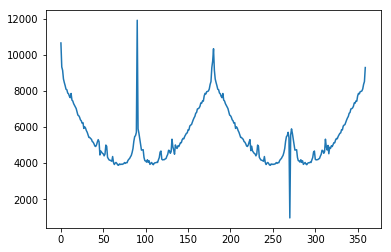

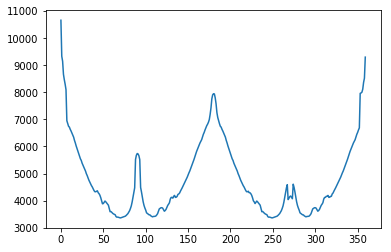

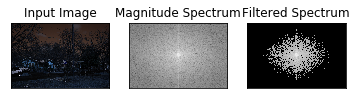

Reading...:D7H_3638.ppm


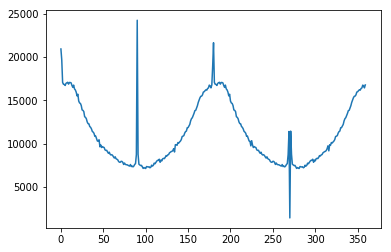

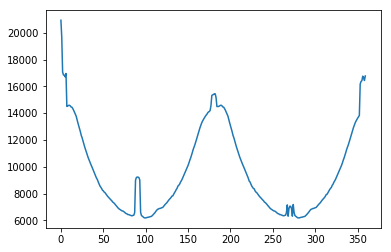

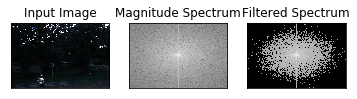

Reading...:cps201410067312.ppm


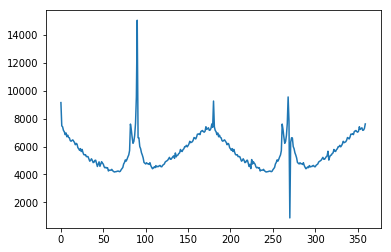

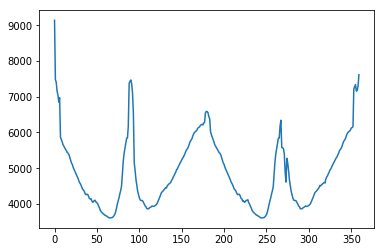

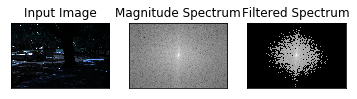

Reading...:cps201410067321.ppm


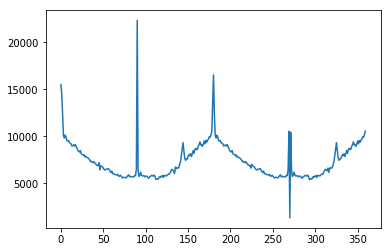

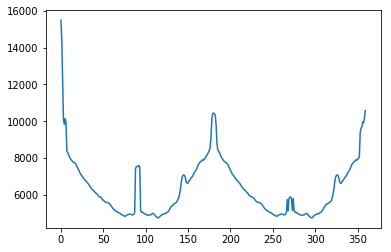

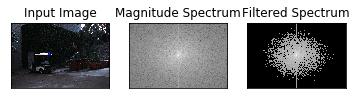

Reading...:cps201410067333.ppm


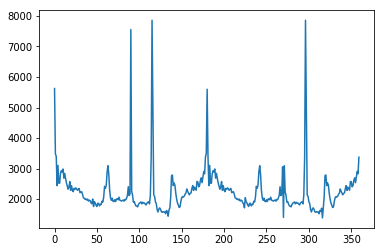

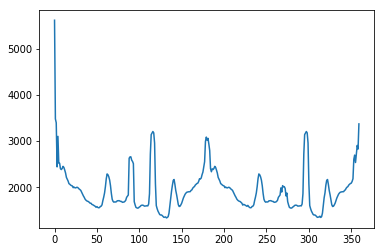

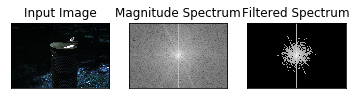

Execution_time: 2569.667459


1

In [12]:

def main():
    directory='Dataset/ManMadeScenesTrain'
#    filename='10.ppm'    
#    image_name = filename
#    print(filename)
#    original_image = readImage(image_name)
        
#    result_array = np.zeros_like(original_image)
    
#    gray_img = cv2.cvtColor(np.array(original_image), cv2.COLOR_BGR2GRAY)
#    result_array = fft(gray_img)
#    result_image = Image.fromarray(result_array)
        
#    binary_image = Image.fromarray(cart2pol(result_array,filename))
    
#    DEV_drawGui(original_image, binary_image)
    start=time.time()
    
    for filename in os.listdir(directory):
        copyfile(directory+'/'+filename, filename)
        #filename='3.ppm'    
        image_name = filename
        print('Reading...:'+filename)
        original_image = readImage(image_name)
        
        result_array = np.zeros_like(original_image)
    
        gray_img = cv2.cvtColor(np.array(original_image), cv2.COLOR_BGR2GRAY)
        result_array = fft(gray_img)
        result_image = Image.fromarray(result_array)
        
        angles, binary_image = cart2pol(result_array)
        
        filteredAngles = meanFilterHistogram(angles,7)  
        label=np.array([1])
    #print(label.shape)
    #print(filteredAngles.T.shape)
    
        feature_print=np.concatenate((label,np.ravel(filteredAngles)))
        feature_print=feature_print.reshape((361,1))
    
        
        
        with open('features.csv', 'a') as csvFile:
            writer = csv.writer(csvFile,delimiter ='\t')
#        writer.writerows(map(lambda x: [x], feature_print.T))
            writer.writerows(feature_print.T)
        csvFile.close()
        
        plt.plot(angles)
        plt.show()
        plt.plot(filteredAngles)
        #plt.savefig(filename+'_hist'+'.png')
        plt.show()
    
        DEV_drawGui(original_image, result_image, Image.fromarray(binary_image))
        os.remove(filename) 
    end=time.time()
    print('Execution_time: %f'%(end-start))
    return 1
##

main()